In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Feature engineering: create moving average features
stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data = stock_data.dropna()  # Drop rows with missing values

# Select features and target variable
features = stock_data[['Open', 'Volume', 'MA10', 'MA50']]
target = stock_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Example function to evaluate and compare models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print(f'Model: {model}')
    print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
    print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Plot the predictions vs actual values
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Price')
    plt.plot(stock_data.index[-len(y_test):], y_pred, label='Predicted Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Prediction for {ticker} Using {model}')
    plt.legend()
    plt.show()

Model: LinearRegression()
Train MSE: 4.688222438175861, Train R^2: 0.9946881047731103
Test MSE: 7.420220494487074, Test R^2: 0.9383742008528492


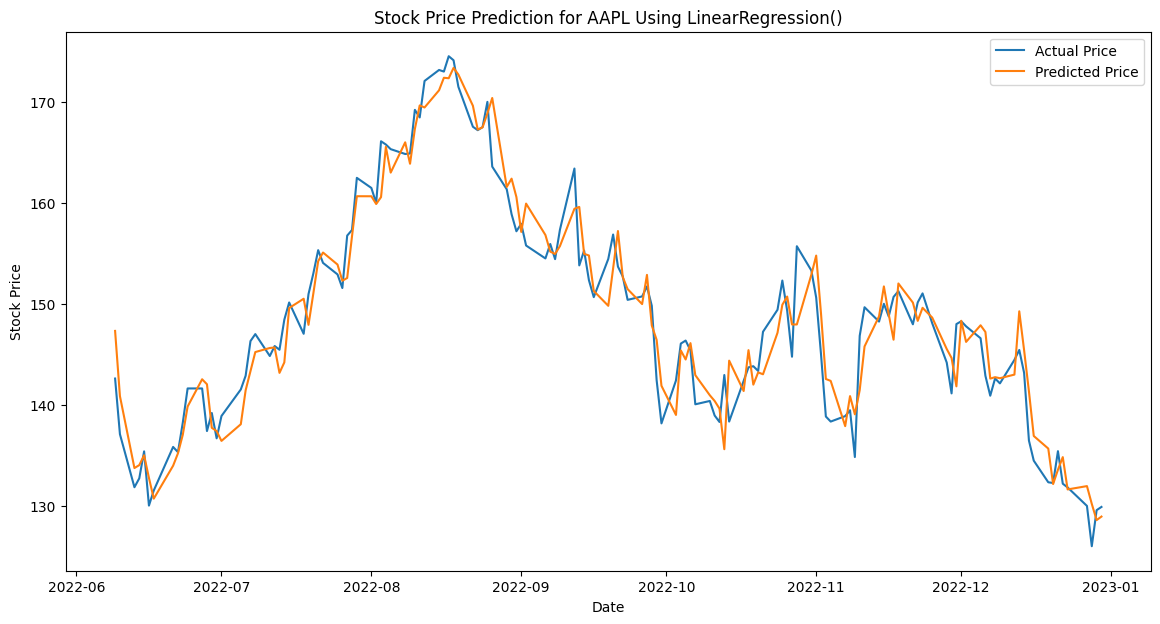

Model: DecisionTreeRegressor()
Train MSE: 0.0, Train R^2: 1.0
Test MSE: 14.090255055596648, Test R^2: 0.8829787836313686


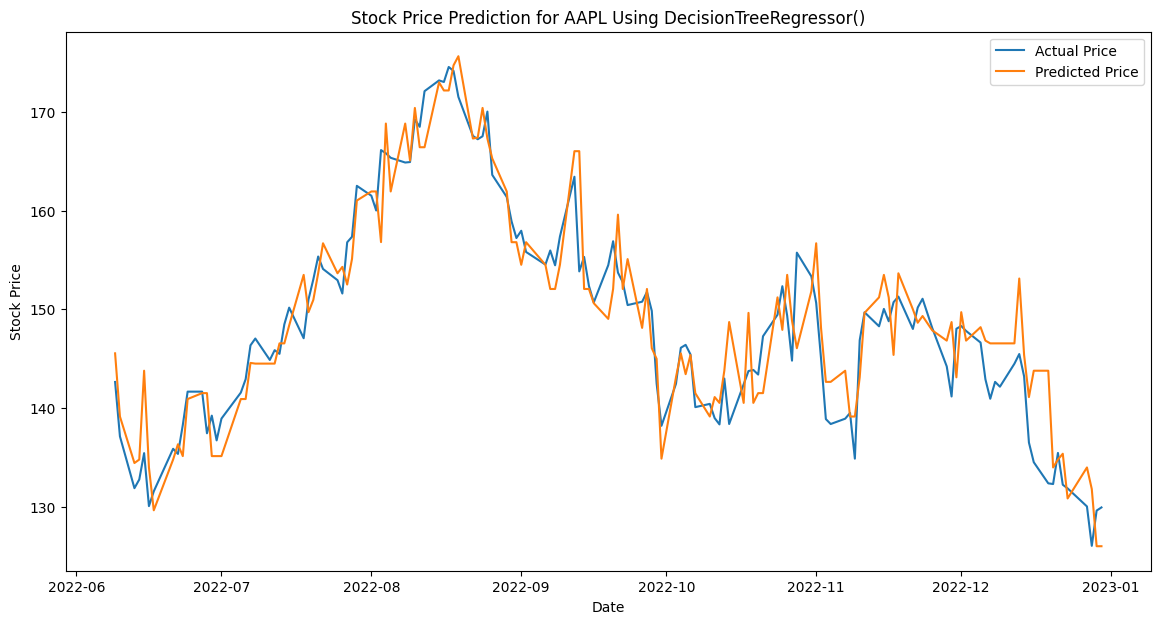

Model: RandomForestRegressor()
Train MSE: 0.8290357620095556, Train R^2: 0.9990606778656064
Test MSE: 9.00195903335147, Test R^2: 0.925237677272211


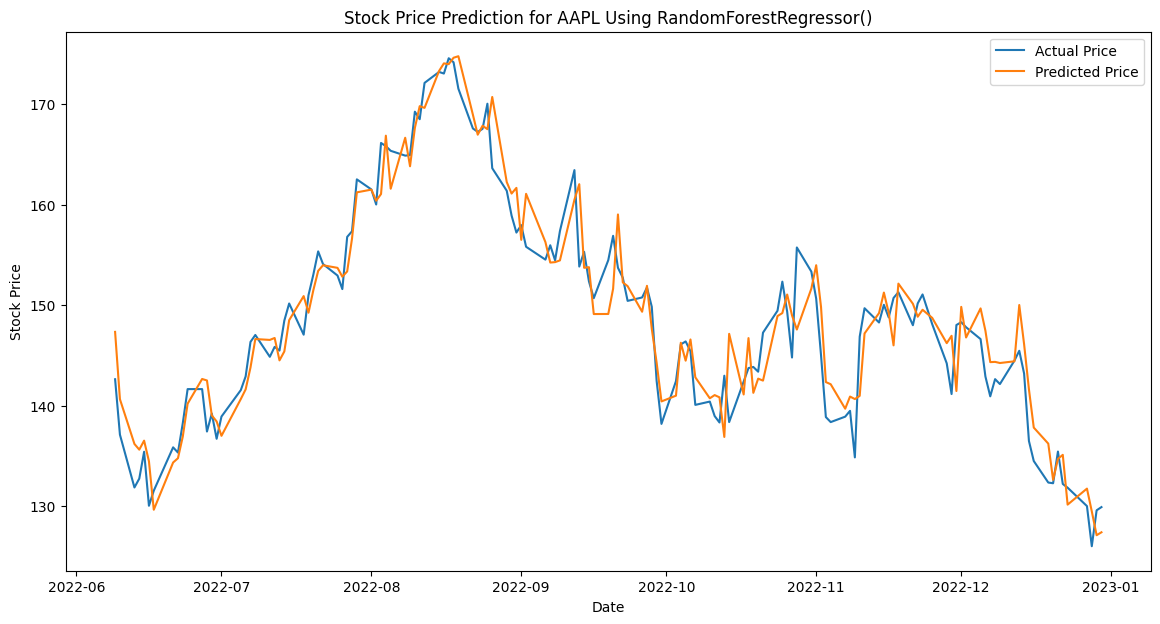

Model: GradientBoostingRegressor()
Train MSE: 1.9697852967144414, Train R^2: 0.9977681747712283
Test MSE: 8.693177623211584, Test R^2: 0.9278021430014696


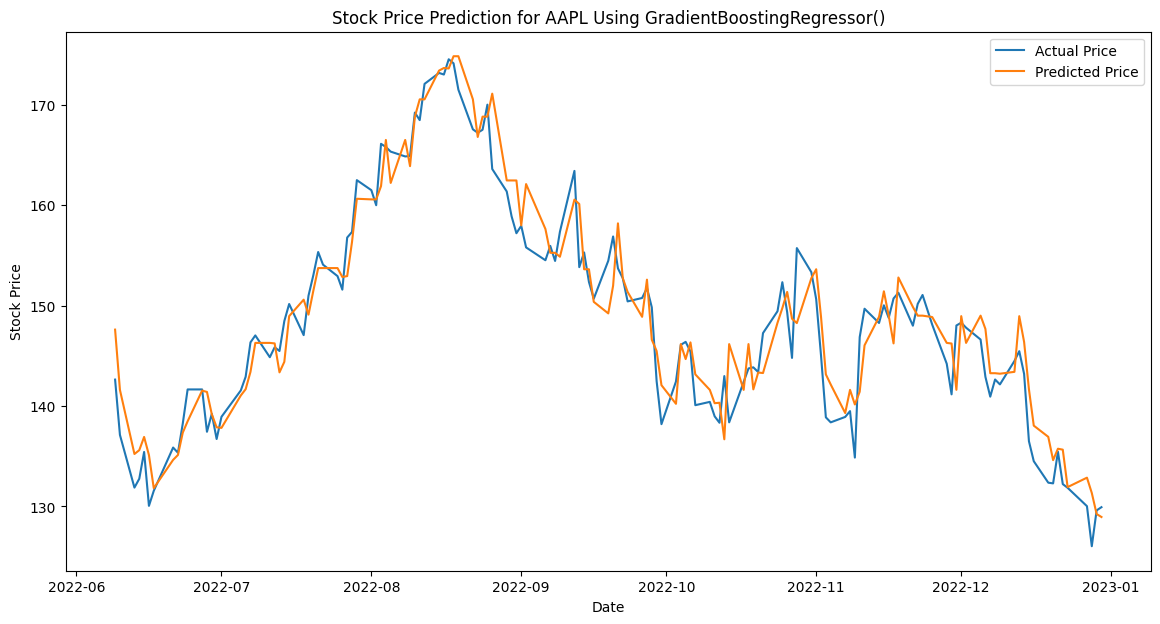

Model: SVR(C=100, gamma=0.1)
Train MSE: 4.606426148238753, Train R^2: 0.9947807823983348
Test MSE: 7.997953776481617, Test R^2: 0.9335760583686371


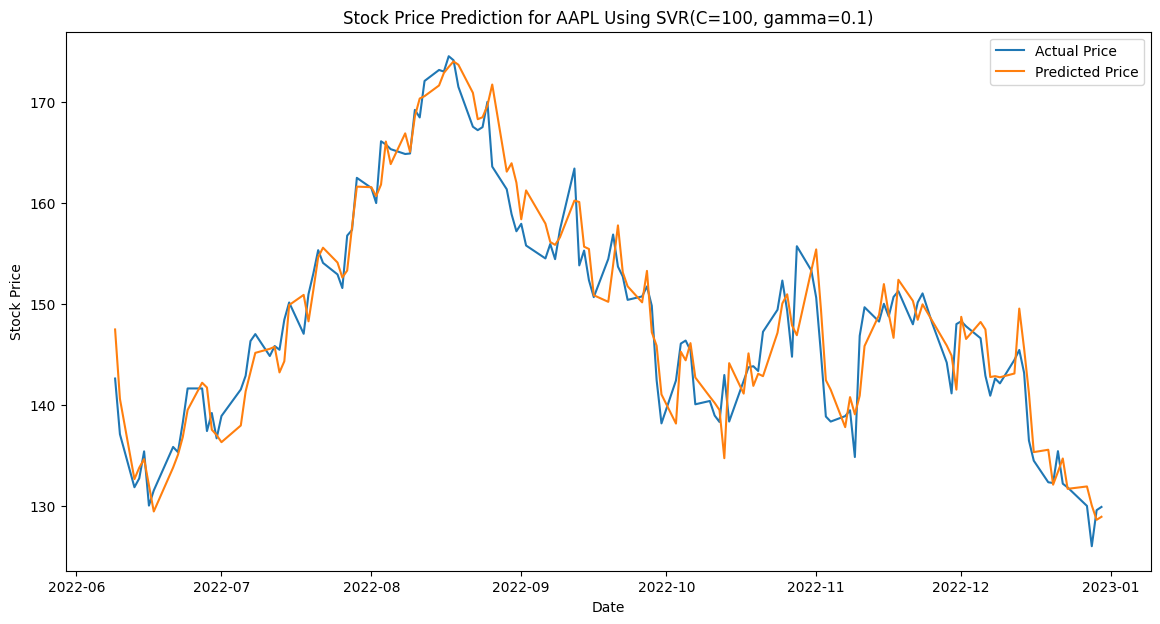

Model: KNeighborsRegressor()
Train MSE: 6.584909975434968, Train R^2: 0.9925391014762471
Test MSE: 24.042902417118935, Test R^2: 0.8003208831364602


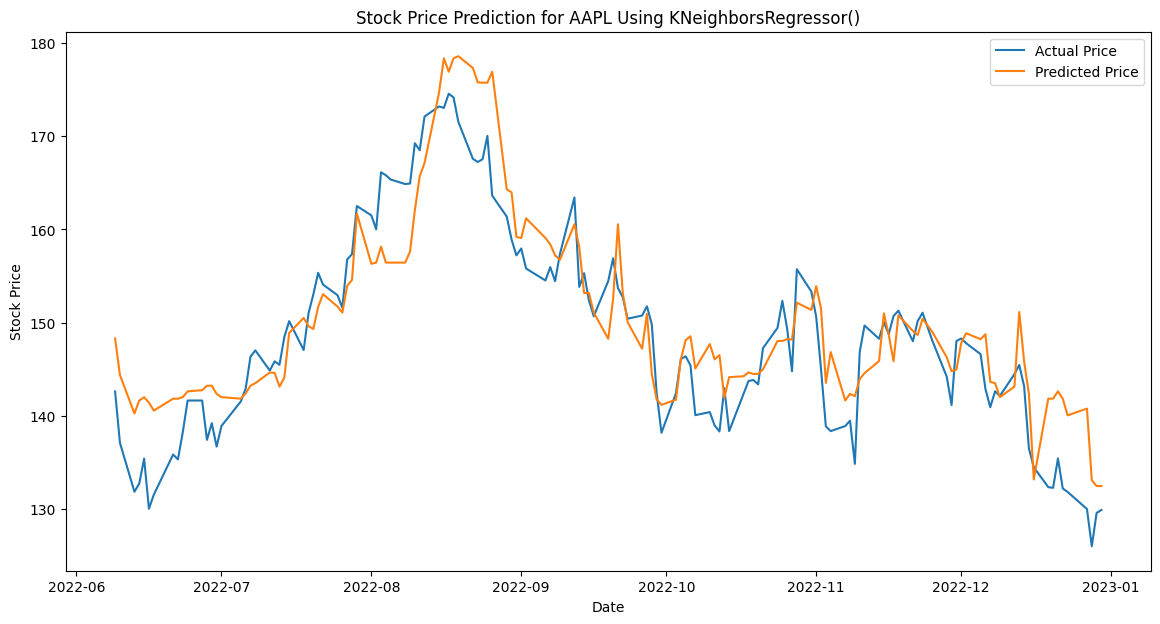

Model: MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
Train MSE: 4.41609684472674, Train R^2: 0.994996431150542
Test MSE: 7.830734736507007, Test R^2: 0.9349648320551752


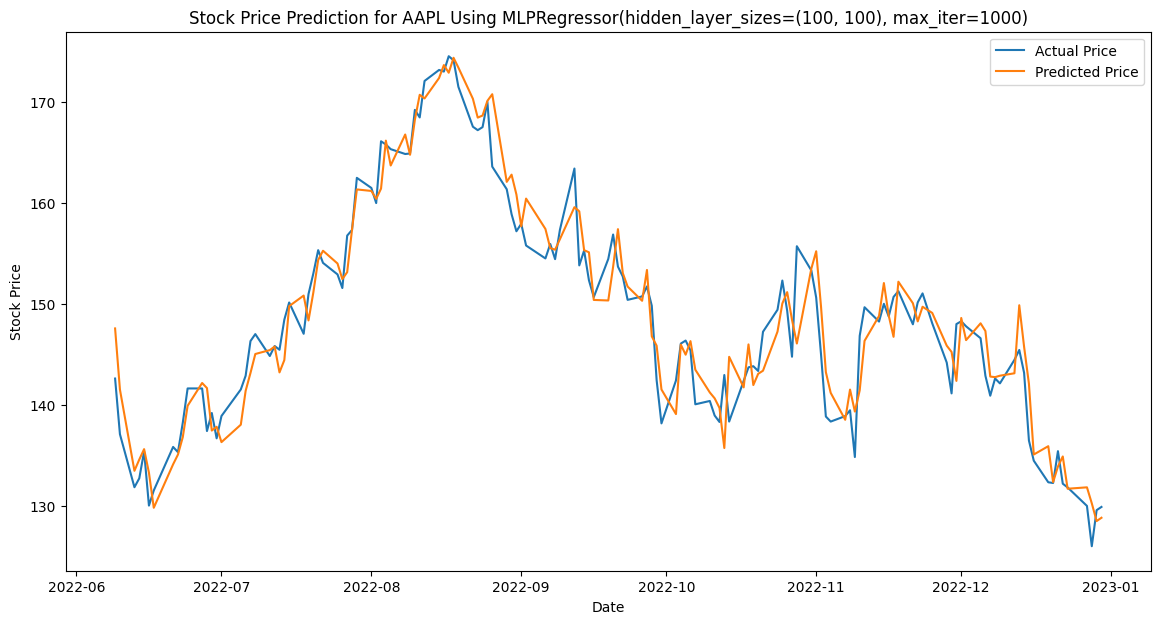

In [5]:
# Evaluate a few models
evaluate_model(LinearRegression(), X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(DecisionTreeRegressor(), X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(RandomForestRegressor(n_estimators=100), X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(GradientBoostingRegressor(n_estimators=100), X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(SVR(kernel='rbf', C=100, gamma=0.1), X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(KNeighborsRegressor(n_neighbors=5), X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model(MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000), X_train_scaled, y_train, X_test_scaled, y_test)